# MT2504 Computing Project (Semester 1 2024/25)

#### Make a copy

Before going any further, right-click on this file in the files pane on the left and click "Duplicate" to make a copy to work in, so that you have a fresh copy available if needed.

#### Prerequisites
You should have attempted the Week 5 worksheet, and completed the MT2000 Computing Workshop prior to this.

#### Submitting your project

The deadline for this project is 5pm on Thursday of Week 9 (14th November). There are 30 marks available in this project, and it is worth 15% of your final grade in the module.

In order to submit your project, you must download it from this server **as a .ipynb notebook** using `File> Download`. You can then upload it to the relevant area on MySaint. You **must** download it in this way; other formats are not acceptable.

Your notebook must produce the correct results when run from top to bottom with a fresh Python kernel. To test this, you should click `Kernel> Restart Kernel and Run All Cells`. You should also **validate** your project before submitting it (see below).

The process for submitting your project is therefore
1. Use `Kernel> Restart and Run All Cells` to ensure that your code works correctly when run in sequence.
2. Click the `Validate` button in the toolbar to ensure that your project passes the included validation cells.
3. Download your project using `File> Download`.
4. Upload this file to MySaint.

#### Validation

The project already contains a number of code cells marked `# VALIDATION CELL`. You do not need to, and should not, make any changes to these cells.  Running one of these cells will perform some simple checks on the format of your work (for example, checking whether you have defined the function a question asks for). If a problem is detected an error will be produced giving you some feedback; if there is no detected problem there will be no output. **These cells do not test if your answer is actually correct**. You can run all of the validation cells by clicking the `Validate` button on the menu bar, but be aware that the validation for questions you have not attempted yet will automatically fail.

#### Getting help
Help is available during your scheduled computing classes.

As well as the Week 5 worksheet, we recommend consulting sections of the [NetworkX tutorial](https://networkx.org/documentation/stable/tutorial.html).

#### Guidance

There is a [generic guidance document](https://moody.st-andrews.ac.uk/moodle/pluginfile.php/1949397/mod_resource/content/2/generic-guidance-23.html) on Moodle which you should read before attempting the project. This contains important information which may affect your grade.

We suggest that you work in a copy of the project (right-click and Duplicate the file in the pane on the left). If you need a fresh copy of the project, follow the instructions in the guidance document under "Accidentally modified or deleted cells".

#### Question 1.

Consider the following graph $G$:

<img src="adj_fig1.svg" width=30% alt="A graph G with vertices 0 up to 7. The edges are {0, 1}, {0, 3}, {1, 2}, {1, 4}, {1, 5}, {1, 6}, {2, 3}, {3, 4}, {3, 6}, {3, 7}, {4, 5}, {4, 6}, {4, 7} {5, 6}, and {6, 7}.">

*(a) Create the graph $G$ as a NetworkX graph, and store it as a variable `G`.* <b> [1 Mark] </b>

*(b) Display the graph `G` with a circular layout, and node-labels included.* <b> [1 Mark] </b>

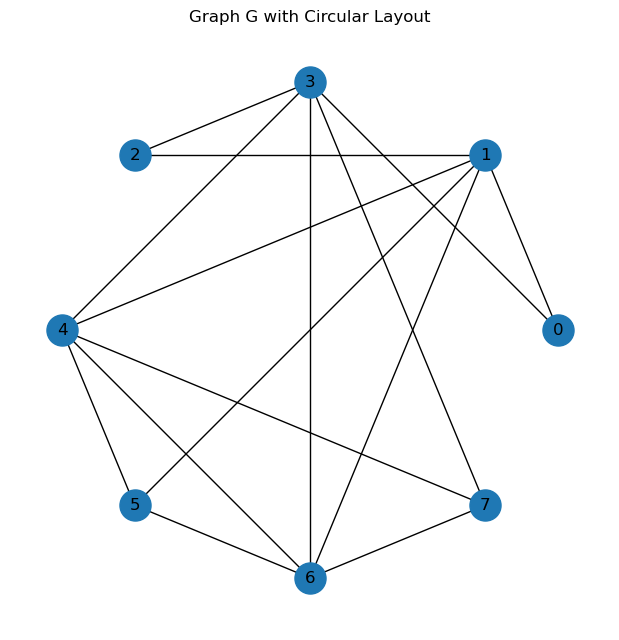

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# create graph and add edges stored in list
G = nx.Graph()
edges = [(0, 1), (0, 3), (1, 2), (1, 4), (1, 5), (1, 6), (2, 3), (3, 4), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (6, 7)]

# adding edges to graph in a loop
for edge in edges:
    G.add_edge(*edge) # unpacking tuple and adding the edge

# display with circular layout
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, pos=nx.circular_layout(G), node_size=500, font_size=12)
plt.title("Graph G with Circular Layout")
plt.show()

In [2]:
# VALIDATION CELL
if not "G" in globals():
    raise NotImplementedError("G has not been defined in Question 1")

from unittest import TestCase
import networkx as nbg_nx

nbg_tc = TestCase()

# G should be a NetworkX graph
nbg_tc.assertIsInstance(G, nbg_nx.Graph)




#### Question 2.

*(a) Use the NetworkX function `to_numpy_array` to compute the adjacency matrix $G$. Change the type of the entries to be integers rather than floats, and store the resulting array as a variable `A`.* **[2 marks]**

*(b) Calculate $A^2$, and store it as a variable `B`.* **[1 mark]**

You should carefully check that these are the correct matrices by hand.

In [3]:
import numpy as np
# compute adjacency matrix and change entries to integers rather than floats
A = nx.to_numpy_array(G, nodelist=[0, 1, 2, 3, 4, 5, 6, 7], dtype=int)

# calculate A^2 (numpy multiplication)
B = np.matmul(A, A)

# display matrices for verification
print("Adjacency Matrix A:\n", A)
print("\nMatrix B=(A^2):\n", B)


Adjacency Matrix A:
 [[0 1 0 1 0 0 0 0]
 [1 0 1 0 1 1 1 0]
 [0 1 0 1 0 0 0 0]
 [1 0 1 0 1 0 1 1]
 [0 1 0 1 0 1 1 1]
 [0 1 0 0 1 0 1 0]
 [0 1 0 1 1 1 0 1]
 [0 0 0 1 1 0 1 0]]

Matrix B=(A^2):
 [[2 0 2 0 2 1 2 1]
 [0 5 0 4 2 2 2 2]
 [2 0 2 0 2 1 2 1]
 [0 4 0 5 2 2 2 2]
 [2 2 2 2 5 2 4 2]
 [1 2 1 2 2 3 2 2]
 [2 2 2 2 4 2 5 2]
 [1 2 1 2 2 2 2 3]]


In [4]:
# VALIDATION CELL
if not "A" in globals():
    raise NotImplementedError("A has not been defined in Question 2")

# A should be a numpy array
nbg_tc.assertIsInstance(A, np.ndarray)
# A should have datatype int
nbg_tc.assertEqual(A.dtype, np.dtype(int))


In [5]:
# VALIDATION CELL
if not "B" in globals():
    raise NotImplementedError("B has not been defined in Question 2")

# B should be a numpy array
nbg_tc.assertIsInstance(B, np.ndarray)
# B should have datatype int
nbg_tc.assertEqual(B.dtype, np.dtype(int))


#### Question 3.

Here is an algorithm to find the number of paths of length two between two nodes in a graph. The **input** is a graph $H$ and two nodes $u$ and $w$ of $H$. The **output** is the number of paths of length two between $u$ and $w$.

1. Initially, set the number of paths from $u$ to $w$ to be $0$.
2. Make a list of the neighbours of $u$.
3. For each neighbour $x$ of $u$, check whether $x$ is a neighbour of $w$. If so, add $1$ to the number of paths.
4. Return the number of paths.


*(a) Implement the above algorithm as a Python function called `number_of_paths_length_two`.* **[3 marks]**

Your function must have input and output as described above.

*(b) Run your function on nodes $3$ and $6$, and on nodes $4$ and $6$, of the graph $G$ from Question 1. Store the results as variables `number_of_paths_3_6` and `number_of_paths_4_6`.*   **[1 mark]**

You should manually check that your function gives the right answers.

In [6]:
# @params H (input graph), u (graph node), w (graph node)
def number_of_paths_length_two(H, u, w):
    path_count = 0
    # get the neighbors of node u
    neighbors_u = list(H.neighbors(u))
    
    # for each neighbor of u, check if it is also a neighbor of w
    for x in neighbors_u:
        if H.has_edge(x, w): 
            path_count += 1
    
    return path_count

In [7]:
number_of_paths_3_6 = number_of_paths_length_two(G, 3, 6)
number_of_paths_4_6 = number_of_paths_length_two(G, 4, 6)

print("Number of paths of length two between nodes 3 and 6:", number_of_paths_3_6)
print("Number of paths of length two between nodes 4 and 6:", number_of_paths_4_6)

Number of paths of length two between nodes 3 and 6: 2
Number of paths of length two between nodes 4 and 6: 4


In [8]:
# VALIDATION CELL
if not "number_of_paths_length_two" in globals():
    raise NotImplementedError("number_of_paths_length_two has not been defined in Question 3")


In [9]:
# VALIDATION CELL
for var in ["number_of_paths_3_6", "number_of_paths_4_6"]:
    if not var in globals():
        raise NotImplementedError(f"{var} has not been defined in Question 3")


#### Question 4.

*(a) Write some code to do the following to the graph $G$ from Question 1: for every pair $i, j \in \{0, 1, \ldots, 7 \}$, determine the number of paths of length two connected nodes $i$ and $j$ in $G$, and test whether it is equal to $b_{ij}$ (where $B = [b_{ij}]$).* **[2 marks]**

You should not print the result of each test individually, but instead test whether or not any of the values disagree, and print out the answer after testing all of them.

*(b) In the text cell below, make a conjecture about the relationship between the paths of length two in a graph, and the square of the adjacency matrix.* **[1 mark]**

In [10]:
# initialize boolean flag to track if all values match
all_values_match = True
# n_nodes = 8
n_nodes = G.number_of_nodes()

# loop through all pairs (i, j) to compare paths of length 2 with B[i][j]
# @params G (graph from question 1), B (B=A^2, where A is the adjacency matrix of the graph G), n_nodes (number of nodes in G)
for i in range(n_nodes):
    for j in range(n_nodes):
        # compute the number of paths of length two between nodes i and j
        path_count = number_of_paths_length_two(G, i, j)
        
        # compare with corresponding entry in B
        if path_count != B[i][j]:
            all_values_match = False
            break  # exit loop if a single mismatch is found

if all_values_match:
    print("All values match: the paths of length two between each pair of nodes correspond to the entries in B.")
else:
    print("Mismatch: there is at least one pair of nodes where the paths of length two do not match the entries in B.")


All values match: the paths of length two between each pair of nodes correspond to the entries in B.


$Conjecture:$ For any graph $G$, with adjacency matrix $A$ of $G$, $A^2$ represents the number of paths of length 2 between each pair of nodes in the graph. To be more precise, for matrix $B = A^2$, $B[i][j]$ represents the number of paths of length 2 between nodes $i$ and $j$.



#### Question 5.

When calling the function `erdos_renyi_graph` to create a random graph, you can give it the additional argument `seed = x`. Specifying this seed makes the function give you back the same graph every time you call it with the same arguments.



*(a) Use the `NetworkX` command `erdos_renyi_graph` with probability $0.6$, and the seed set to $123$, to define a random graph <!--  -->with fifteen nodes. Store this in a variable `random_graph`.* **[1 mark]**

*(b) Find the number of edges of `random_graph`, and store the answer as a variable `Q5b_edges`.* **[1 mark]**

*(c) Use Python to calculate the probability of getting between 40 and 65 (inclusive) edges in such a random graph. Store your answer in a variable `Q5c_probability`.* **[2 marks]**

You may find the `comb` function from the `math` module helpful.

*(d) Use Python to calculate the probability that node $4$ has degree exactly $5$ in a random graph with fifteen nodes and edge-probability $0.6$. Store your answer as a variable `Q5d_probability`.* **[2 marks]**

In [11]:
# generate random graph
# @params n (number of nodes), p (edge probability), seed (reproducability factor)
random_graph = nx.erdos_renyi_graph(n=15, p=0.6, seed=123)

print(random_graph)

Graph with 15 nodes and 71 edges


In [12]:
# number of edges in the graph
Q5b_edges = random_graph.number_of_edges()

print("The number of edges in the random graph is:", Q5b_edges)

The number of edges in the random graph is: 71


In [13]:
import math

# @params for binomial distribution: 
# n_edges (15C2 ways of having edges between 2 nodes out of 15 total nodes)
# p_edge (probability of an edge existing between two nodes)
# k_min (lower bound for number of edges)
# k_max (upper bound for number of edges)

n_edges = math.comb(15,2)
p_edge = 0.6
k_min, k_max = 40, 65

# cumulative probability for k between 40 and 65, following a binomial distribution (edge either exists, or doesn't exist) 
Q5c_probability = 0

for k in range(k_min, k_max + 1):
    # binomial pmf for P(X = k)
    binom_prob = math.comb(n_edges, k) * (p_edge ** k) * ((1 - p_edge) ** (n_edges - k))
    Q5c_probability += binom_prob  # sum the probabilities to get cumulative probability

print("The probability of getting between 40 and 65 (inclusive) edges in such a random graph is:", Q5c_probability)

The probability of getting between 40 and 65 (inclusive) edges in such a random graph is: 0.6888768234099202


In [14]:
# @params n_neighbors (14 neighbors for node 4 out of total 15 nodes), k_degree (number of edges)
n_neighbors = 14
k_degree = 5

# probability that node 4 has exactly 5 neighbors, following binomial pmf logic from before
Q5d_probability = (math.comb(n_neighbors, k_degree) * (p_edge ** k_degree) * ((1 - p_edge) ** (n_neighbors - k_degree)))

print("The probability that node 4 has degree exactly 5 in a random graph with 15 nodes and edge-probability 0.6 is:", Q5d_probability)

The probability that node 4 has degree exactly 5 in a random graph with 15 nodes and edge-probability 0.6 is: 0.040809403514880015


In [15]:
# VALIDATION CELL
if not "random_graph" in globals():
    raise NotImplementedError("random_graph has not been defined in Question 5")


In [16]:
# VALIDATION CELL
if not "Q5b_edges" in globals():
    raise NotImplementedError("Q5b_edges has not been defined in Question 5")


In [17]:
# VALIDATION CELL
if not "Q5c_probability" in globals():
    raise NotImplementedError("Q5c_probability has not been defined in Question 5")


In [18]:
# VALIDATION CELL
if not "Q5d_probability" in globals():
    raise NotImplementedError("Q5d_probability has not been defined in Question 5")


#### Question 6.

**Definition:** A *triangle* $T$ in a graph $G$ is a set of three nodes of $G$ which are mutually adjacent. That is, $T = \{v_1, v_2, v_3\}$ where $v_1$ is adjacent to both $v_2$ and $v_3$, and $v_2$ is also adjacent to $v_3$.

**Remark:** If $1, 2, 3$ are three mutually adjacent nodes in a graph, then $\{1, 2, 3\}$ and $\{1, 3, 2\}$ are one and the same triangle, whereas $1 \to 2 \to 3 \to 1$ and $1 \to 3 \to 2 \to 1$ are different paths of length $3$.

*(a) Write a function `number_of_triangles`, which takes as input a graph $G$, and returns as output the number of triangles in $G$.* **[3 marks]**

You can assume that the nodes of the graph are $\{0, 1, \ldots, n\}$ for some $n$.

*(b) Create a random graph `K` with eight nodes, edge-probability $0.4$, and seed $12345$. Find the number of triangles in this graph using `number_of_triangles`, and store this number as a variable `Q6b_triangles`.* **[1 mark]**

*(c) Let $L$ be the adjacency matrix of $K$. Find the sum of the diagonal entries of $L^3$, and store this number as a variable `Q6c_diagonal_sum`.* **[1 mark]**

*(d) In the text cell below, make a general conjecture connecting the diagonal entries of $L^3$ and the number of triangles in $K$.* **[1 mark]**

In [19]:
# @params G (input graph to test for triangles)
def number_of_triangles(G):
    count = 0
    for u in G:
        neighbors = list(G.neighbors(u)) # u is the node we are initially looking at, to check for triangles with its neighbors
        for i in range(len(neighbors)):
            for j in range(i + 1, len(neighbors)):
                v, w = neighbors[i], neighbors[j]
                if G.has_edge(v, w):
                    count += 1  # found a triangle
    return count // 3  # each triangle is counted three times; integer division for number of unique triangles

print("The number of unique triangles in G is:", number_of_triangles(G))

The number of unique triangles in G is: 8


In [20]:
K = nx.erdos_renyi_graph(n=8, p=0.4, seed=12345)

# count triangles
Q6b_triangles = number_of_triangles(K)
print("The number of triangles in K is: ", Q6b_triangles)


The number of triangles in K is:  5


In [21]:
import numpy as np

# L is the adjacency matrix of K
L = nx.to_numpy_array(K, dtype=int)

# compute L^3; here we are first calculating L^2, then multiplying that matrix by L to get L^3
L_cubed = np.matmul(np.matmul(L,L), L)


# sum of the diagonal elements (trace) of L^3
Q6c_diagonal_sum = np.trace(L_cubed)
print("The trace of L^3 is:", Q6c_diagonal_sum)

The trace of L^3 is: 30


$Conjecture:$ For a graph $K$ with adjacency matrix $L$, the sum of the diagonal entries (trace) in $L^3$ is six times the total number of triangles in $K$.

In [22]:
# VALIDATION CELL
if not "number_of_triangles" in globals():
    raise NotImplementedError("number_of_triangles has not been defined in Question 6")


In [23]:
# VALIDATION CELL
if not "Q6b_triangles" in globals():
    raise NotImplementedError("Q6b_triangles has not been defined in Question 6")


In [24]:
# VALIDATION CELL
if not "number_of_triangles" in globals():
    raise NotImplementedError("number_of_triangles has not been defined in Question 6")


#### Question 7.

The following algorithm is a way to determine whether a graph $G$ is connected.

1. Let $A$ be the adjacency matrix of $G$, and let $W$ be an initially empty subset of the nodes of $G$.
2. While $W \neq V$, and $A$ does not have all entries equal to $1$, do the following:
   1. Choose any node $u$ of $G$ that is currently not in $W$, and add it to $W$.
   2. For each pair $v, w$ of nodes of $G$ with $A[v, w] = 0$:
        1. If $A[v, u] = 1 = A[u, w]$, then there is a path from $v$ to $u$ and from $u$ to $w$, and hence a path from $v$ to $w$. So set $A[v, w] = A[w, v] = 1$.
3. If $A$ has all entries equal to $1$, return `True`. Otherwise, return `False` and the matrix `A`.

*(a) Write a Python function `has_all_ones` which takes as input a square numpy array `X`, and returns `True` if each entry is $1$ and `False` otherwise.* **[2 marks]**

Note that the output must be a boolean value `True` or `False`, **not** the strings `"True"` or `"False"`.

*(b) Write a Python function `is_connected` which implements the connectivity algorithm above. It should have **input** a graph, and **output** a boolean `True` or `False`, and should use your `has_all_ones` function.* **[4 marks]**.

You can assume that the nodes of the graph are $\{0, 1, \ldots, n\}$ for some $n$.

You should check that your function works using random graphs of size $10$ with varying edge-probabilities.


In [25]:
# @params X (square numpy array)
def has_all_ones(X):
    # calculate the number of rows/columns of the square matrix
    n = len(X)
    
    # check if each element in the matrix is 1
    for i in range(n):
        for j in range(n):
            # if any element is not 1, return False immediately
            if X[i][j] != 1:
                return False
    # if all elements are 1, return True
    return True


In [26]:
import networkx as nx
import numpy as np

# @params G (input graph)
def is_connected(G):
    # A is the adjacency matrix of G
    A = nx.to_numpy_array(G, dtype=int)
    n = len(A)
    W = set()

    # following algorithm logic as provided
    while len(W) < n and not has_all_ones(A):
        # select a node not in W and add it to the set 
        u = next(node for node in range(n) if node not in W)
        W.add(u)
        
        # update paths in adjacency matrix A
        for v in range(n):
            for w in range(n): 
                if A[v, w] == 0 and (A[v, u] == 1 and A[u, w] == 1):
                    A[v, w] = 1
                    A[w, v] = 1

    # check if all entries in A are 1
    return has_all_ones(A)

print("The input graph is connected: ", is_connected(G))

The input graph is connected:  True


In [27]:
# testing random graphs for connectivity
G_1 = nx.erdos_renyi_graph(10, 0.8, seed=100)  # likely to be connected since edge probability is high
G_2 = nx.erdos_renyi_graph(10, 0.1, seed=100)  # likely to be disconnected since edge probability is low

print("Expected connected graph is connected:", is_connected(G_1))  # Expected: True
print("Expected disconnected graph is connected:", is_connected(G_2))  # Expected: False

# upon running the tests, the is_connected() function yields accurate results

Expected connected graph is connected: True
Expected disconnected graph is connected: False


In [28]:
# VALIDATION CELL
if not "has_all_ones" in globals():
    raise NotImplementedError("has_all_ones has not been defined in Question 7")


In [29]:
# VALIDATION CELL
if not "is_connected" in globals():
    raise NotImplementedError("is_connected has not been defined in Question 7")
